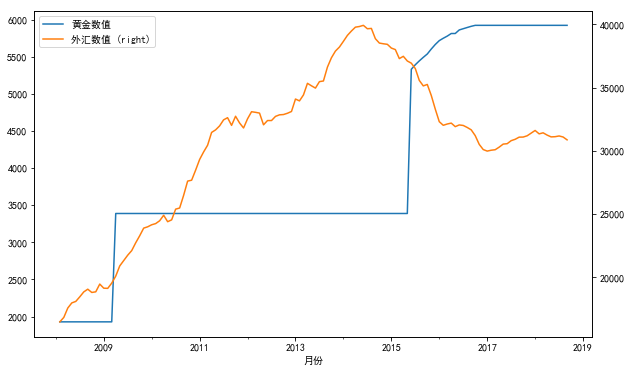

In [3]:
import pandas as pd
import requests
import chardet
import re
from lxml import etree

rooturl='http://data.eastmoney.com/cjsj/goldforexreserve.aspx?p=%s'
urls=[rooturl%i for i in range(1,8)]
l2=[]
for url in urls:
    r=requests.get(url)
    rec=etree.HTML(r.text)
    l1=[]
    for i in rec.xpath('//table[@id="tb"]/tr/td//text()'):
        l1.append(re.sub('[\s]','',i))
    while '' in l1:
        l1.remove('')
    l2.extend(l1)
l3=[]
temp=[]
for i in range(1,len(l2)):    
    temp.append(l2[i-1])
    if i%7==0:
        l3.append(temp)
        temp=[]
df=pd.DataFrame(l3,columns=['月份','外汇数值','w同比','w环比','黄金数值','h同比','h环比'])
df['月份']=df['月份'].str.replace('[^\d]','')
df['外汇数值']=df['外汇数值'].astype(float)
df['黄金数值']=df['黄金数值'].astype(float)
f=lambda x:x[:4]+'.'+x[-2:]
df['月份']=df['月份'].map(f)
df['月份']=pd.to_datetime(df['月份'])
df.sort_values(by='月份',inplace=True)

from matplotlib import pyplot as plt
ax=df.plot(x='月份',y='黄金数值')
df.plot(x='月份',y='外汇数值',secondary_y=True,ax=ax,figsize=(10,6))
plt.show()

In [5]:
chardet.detect(r.content)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}